# Case Study 1: From Exploration to Design

- Name: Ruihua Shen
- Student ID: 97701205
- Link to GitHub Repository: https://github.com/ruihuashen15-cmyk/dsci-200-case-study-1

This blank notebook is provided for you to use to answer questions from [Case Study 1](https://ubc-dsci.github.io/dsci-200/case-studies/case-study-1.html). 

In [1]:
install.packages('tidyverse')
devtools::install_github("lbelzile/hecedsm")
library(tidyverse)
library(hecedsm)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Skipping install of 'hecedsm' from a github remote, the SHA1 (df0a5444) has not changed since last install.
  Use `force = TRUE` to force installation

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘hecedsm’


The following object is masked from ‘package:stringr’:

    words




In [2]:
#Task 1 chose Smartwatches study

#Q1

?hecedsm::BRLS21_EDA
data <- hecedsm::BRLS21_EDA

BRLS21_EDA {hecedsm},R Documentation


Q2 Paper Summary

Goals of the Study The primary objective of this study was to examine the distraction caused by smartwatch use in comparison to mobile phone use while driving. Specifically, the authors aimed to investigate the differential effects of receiving inbound messages (text vs. voice) and sending outbound responses on driver attention and performance.

Importance of the Field This research is highly relevant as the use of wearables, particularly smartwatches, is an emerging trend with projected market growth. While distracted driving laws strictly prohibit mobile phone usage, regulations regarding smartwatches are often ambiguous or nonexistent. Investigating these devices is crucial for informing road safety policies and understanding if smartwatches pose a unique threat compared to smartphones.

Hypotheses The study sought to explore three main hypotheses:

Gaze Distribution (H1): Drivers will exhibit less focus on the driving task (e.g., more off-road glances) when receiving notifications on a smartwatch compared to a smartphone.

Driving Behavior (H2): Receiving written notifications on a smartwatch will have more negative consequences on driving behavior (e.g., violations, speed variance) than on a smartphone.

Mental Workload (H3): The cognitive workload will be higher when interacting with a smartwatch compared to a smartphone

In [3]:
# Task 2 Explore Data
# Q3
glimpse(data)
head(data)

# There are 10,942 observations (rows).
# There are 6 variables (columns)

Rows: 10,942
Columns: 6
$ id        <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ reltime   <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ task      <fct> baseline, baseline, baseline, baseline, baseline, baseline, …
$ occurence <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ eda       <dbl> 20.60959, 21.41062, 22.26244, 24.22100, 24.23851, 23.63703, …
$ hr        <dbl> 88.49560, 88.31564, 78.13892, 65.82009, 65.13290, 66.83456, …


id,reltime,task,occurence,eda,hr
<fct>,<int>,<fct>,<int>,<dbl>,<dbl>
1,0,baseline,1,20.60959,88.49560
1,1,baseline,1,21.41062,88.31564
1,2,baseline,1,22.26244,78.13892
1,3,baseline,1,24.22100,65.82009
1,4,baseline,1,24.23851,65.13290
1,5,baseline,1,23.63703,66.83456


Q4 
The dataset contains both numerical and categorical variables:

Numerical: reltime (integer), occurence (integer), eda (double), and hr (double). These represent quantitative measurements of time and physiological data like heart rate, skin conductance, etc.

Categorical: id (factor) and task (factor). These represent distinct groups or labels, such as the participant's identifier and the experimental condition.

Q5 The categorical variables id and task are already encoded as factors (<fct>), and numerical values are prepared for analysis, so no conversion is needed now.

In [4]:
#Q6 Check for missing values
colSums(is.na(data))

id   reltime      task occurence       eda        hr 
        0         0         0         0       214       538

With 10,942 total observations, the missing proportion for eda is approximately 2.0% (214/10942) and for hr is approximately 4.9% (538/10942).Therefore, there are no variables with a large proportion of missing data, as all missing rates are well below the 20% threshold.

In [5]:
# Q7: Check for class imbalance in categorical variables
# task
data %>%
  count(task)

# id
data %>%
  count(id)

task,n
<fct>,<int>
baseline,2736
cell,3028
voicecall,1392
watch,3786


id,n
<fct>,<int>
1,87
2,352
3,374
4,431
5,374
6,373
7,339
8,378
9,371


For task, much more data was collected (or retained) for the smartwatch condition compared to the voice call condition.
For id, While most participants contributed between 300 and 450 observations, there are outliers indicating imbalance, like 1 only 87, which contributes less to the result of analysis.

Warning message:
“Removed 538 rows containing non-finite outside the scale range (`stat_bin()`).”


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  35.42   64.69   70.48   74.64   80.43  120.00     538 

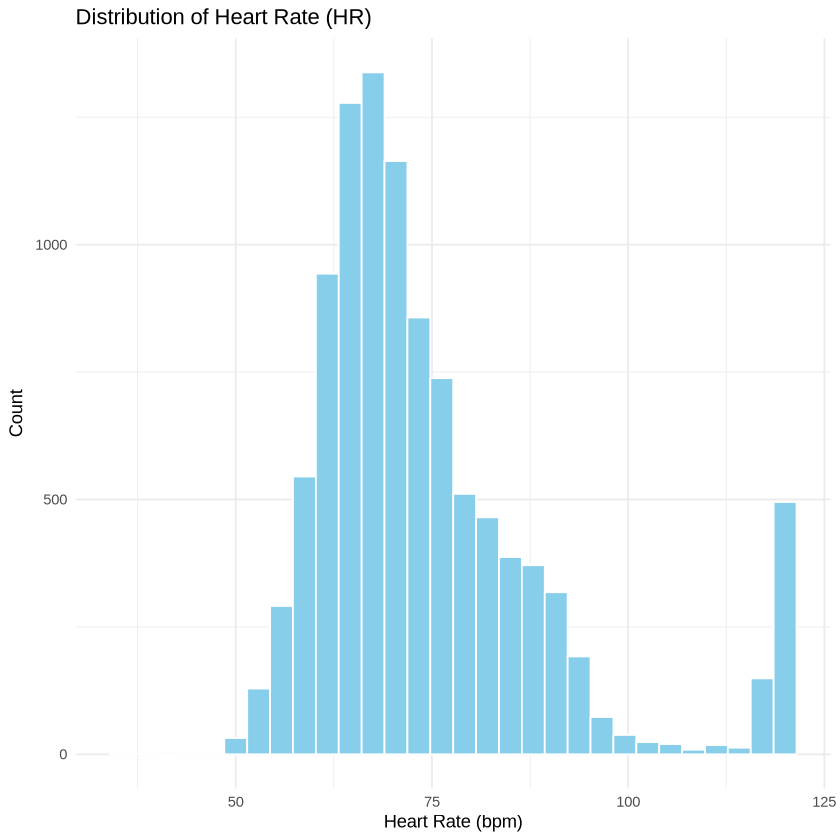

In [6]:
# Task 3 
# Q9: Distribution of one numerical variable (Heart Rate)
ggplot(data, aes(x = hr)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "white") +
  labs(title = "Distribution of Heart Rate (HR)",
       x = "Heart Rate (bpm)",
       y = "Count") +
  theme_minimal()

summary(data$hr)

The histogram of Heart Rate (HR) is unimodal and looks roughly bell-shaped, but it is slightly right-skewed. This is indicated by the tail extending towards higher heart rates (up to 120 bpm) and the mean (74.64) being slightly higher than the median (70.48). A typical observation for heart rate falls in the range of 70 to 80 bpm. The median value of 70.48 bpm confirms that this is a central and typical value for the participants.

Warning message:
“Removed 214 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


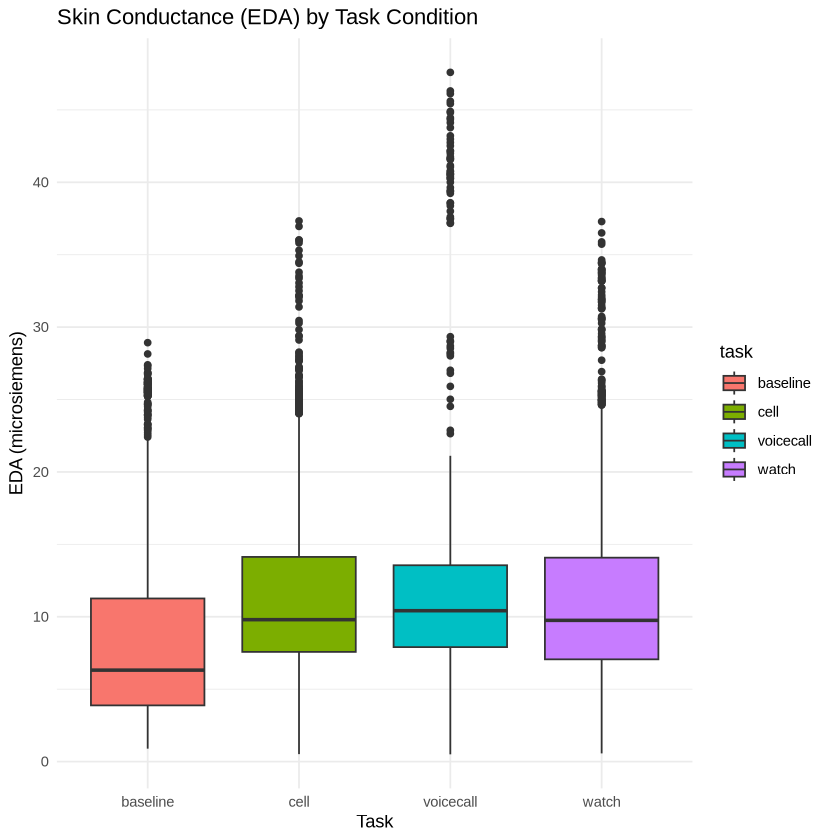

In [7]:
# Q10: Boxplot of EDA by Task
ggplot(data, aes(x = task, y = eda, fill = task)) +
  geom_boxplot() +
  labs(title = "Skin Conductance (EDA) by Task Condition",
       x = "Task",
       y = "EDA (microsiemens)") +
  theme_minimal()

The boxplot shows a clear difference in Skin Conductance (EDA) levels across the tasks. The baseline condition has the lowest median EDA, which appears to be around 6-7 microsiemens. In contrast, all three distraction tasks (cell, voicecall, watch) show higher median EDA levels (around 10 microsiemens). This insight suggests that performing any secondary task while driving increases physiological arousal compared to just driving alone. The distributions for the three distraction tasks are relatively similar, although voicemail shows a noticeable number of high-value outliers (black dots), indicating moments of extreme stress for some participants.

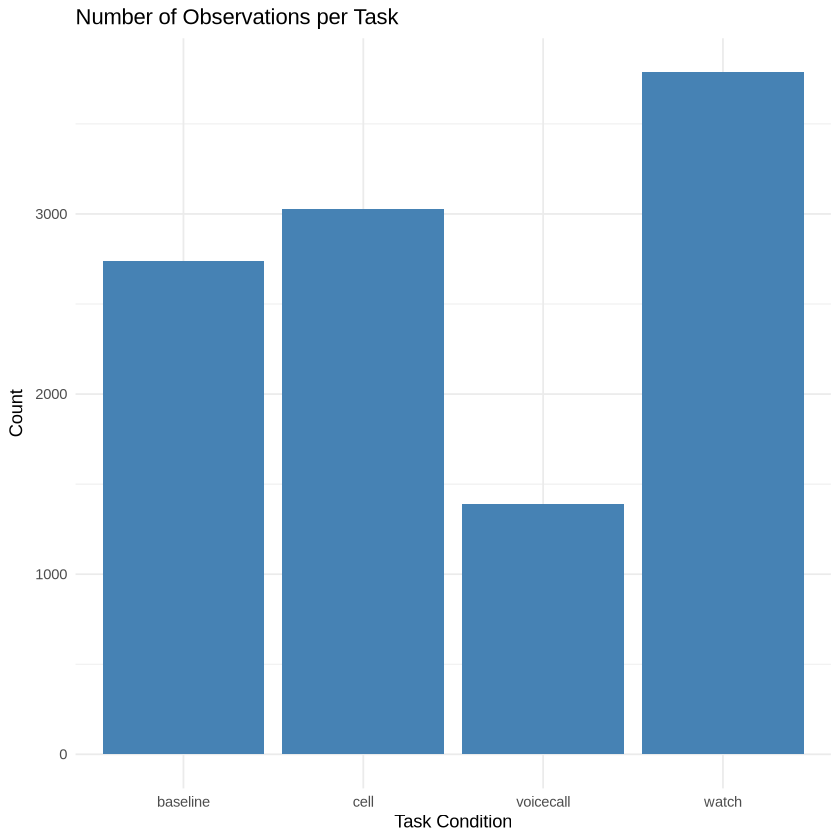

In [8]:
# Q11: Bar chart of Task counts
ggplot(data, aes(x = task)) +
  geom_bar(fill = "steelblue") +
  labs(title = "Number of Observations per Task",
       x = "Task Condition",
       y = "Count") +
  theme_minimal()

The bar chart reveals that the observations are not evenly distributed across the four experimental conditions.
The watch condition has the tallest bar, indicating it contains the largest number of observations.
The voicecall condition has the shortest bar, representing the fewest observations.
The baseline and cell conditions fall in between.
The typical task condition is watch, as it comprises the majority of the data points in this dataset.

In [9]:
# Task 4 Summary Statistics

In [10]:
# Q12: Measure of central tendency for one numerical variable
na.rm = TRUE
mean_hr <- mean(data$hr, na.rm = TRUE)
median_hr <- median(data$hr, na.rm = TRUE)

print(paste("Mean Heart Rate:", mean_hr))
print(paste("Median Heart Rate:", median_hr))

[1] "Mean Heart Rate: 74.6376778681276"
[1] "Median Heart Rate: 70.477255"


The mean heart rate for the participants is approximately 74.64 bpm, and the median heart rate is 70.48 bpm. These two are chosen because

1 Mean: Since the histogram in Q9 showed a distribution that is roughly bell-shaped (unimodal), the mean is an appropriate measure to summarize the central tendency of the data.

2 Median: However, because the distribution was slightly right-skewed, reporting the median is also valuable. The fact that the mean (74.64) is slightly higher than the median (70.48) confirms this slight skew, but their proximity suggests the data is relatively symmetric overall.

In [11]:
# Q14: Measure of Association between two variables (HR vs EDA)
use = "complete.obs"
correlation <- cor(data$hr, data$eda, use = "complete.obs")

print(paste("Correlation between HR and EDA:", round(correlation, 4)))

[1] "Correlation between HR and EDA: 0.1435"


The Pearson correlation coefficient between Heart Rate and Skin Conductance (EDA) is approximately 0.1435.

The value is positive, indicating that as heart rate increases, skin conductance also tends to increase. This aligns with physiological expectations, as both are indicators of arousal or stress.

However, the magnitude is quite weak. This suggests that while there is some association, the relationship is not strongly linear; a participant's heart rate might spike without a proportional increase in skin conductance, or vice versa.

Task 5 
Q15 
Does the type of distraction device (Smartwatch vs. Mobile Phone) result in different levels of physiological stress, as measured by Skin Conductance (EDA), compared to normal driving (Baseline)?

Q16 No, I do not think splitting the data into train and test sets is necessary. Splitting data is typically done for predictive tasks to assess how well a model generalizes to new data(in case the model overfit the original data). However, my question is inferential— to understand and explain the relationship between variables (distraction type and stress) using the current dataset. Therefore, using the full dataset maximizes statistical power for hypothesis testing.

In [12]:
# Q17 Create new feature 'device_type'
data <- data %>%
  mutate(device_type = case_when(
    task == "watch" ~ "Smartwatch",            
    task %in% c("cell", "voicecall") ~ "Phone",
    TRUE ~ "Baseline"                          
  ))

glimpse(data)

Rows: 10,942
Columns: 7
$ id          <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ reltime     <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ task        <fct> baseline, baseline, baseline, baseline, baseline, baseline…
$ occurence   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ eda         <dbl> 20.60959, 21.41062, 22.26244, 24.22100, 24.23851, 23.63703…
$ hr          <dbl> 88.49560, 88.31564, 78.13892, 65.82009, 65.13290, 66.83456…
$ device_type <chr> "Baseline", "Baseline", "Baseline", "Baseline", "Baseline"…


A categorical variable called device_type is constructed.

Two original task levels: cell and voicecall were combined into "Phone", watch was labeled "Smartwatch", and baseline remained "Baseline".

This feature is useful because my research question specifically compares the device (Watch vs. Phone) rather than the specific mode of communication (text vs. voice). It simplifies the analysis and allows for a direct comparison of the two technologies, which fits the research topic.

Task 6 Q18 
"A within-subject experiment was conducted with the notification medium as the main independent variable."
"The goal of this research is to compare distraction caused by a mobile phone and a smartwatch..."

The authors are aiming to answer a Causal question (and by extension, Inferential). Since they conducted a controlled experiment where they manipulated the independent variable (type of device) to observe its effect on the dependent variables (gaze, driving behavior), they are seeking to establish a cause-and-effect relationship. They also use hypothesis testing to infer these results to a broader population of drivers.

Q19
"Thirty-one participants between the ages of 18 and 47 (Mean = 25.61, SD = 6.24) were recruited. Sixteen of them were men."
"Participants were recruited through the research panel of our institution."
The population of interest is generally drivers who use electronic devices (smartwatches or smartphones). The study aims to apply its findings to road safety regulations for the general public.

Q20
"The experiment took place in a university laboratory. Lighting, humidity, and temperature were controlled inside the room."
"The order of the four tasks (or conditions) was randomized."
This is a Controlled Experiment.
The researchers explicitly manipulated the conditions (assigning participants to Watch, Phone, Speaker, or Texting tasks) rather than just observing them in a natural setting. Furthermore, the order of these tasks was randomized  to control for confounding factors like fatigue or practice effects, and the environment (simulator, lighting) was strictly controlled.

Task7 
Q22
The researchers used Convenience Sampling. Convenience sampling involves selecting participants who are easiest to reach or readily available to the researchers. The paper states that participants were recruited through the "research panel of our institution" (the university). This indicates the researchers chose this group because they were accessible within the university environment, rather than randomly selecting from the entire population of drivers (Simple Random Sampling).

Q23
Yes, there is bias. The sample is NOT representative of the population of interest, indicating Sampling Bias.

The sample consists mostly of university affiliates with a mean age of 25.6 years. This is much younger than the general driving population, which includes middle-aged and elderly drivers. University students are generally more comfortable with technology (smartphones/smartwatches) than the average older driver. Because the sample excludes older or less tech-savvy drivers, the study likely underestimates the difficulty and distraction levels that the general population would experience.

Task8 Q24
Task 8: Question 24

I would replace the original convenience sampling with Stratified Random Sampling based on age groups (e.g., 18-30, 31-50, 50+). This ensures the sample includes older adults and experienced drivers, rather than just young university students.

I expect the results would show an even larger difference in distraction levels. Older or less tech-savvy drivers likely struggle more with small smartwatch interfaces compared to the young sample, potentially leading to slower reaction times and more driving errors in the general population.

The authors likely chose convenience sampling for feasibility and low cost. Recruiting students on campus is much faster and cheaper than finding a representative sample of the general public.

The main limitation could be cost and logistics. Recruiting specific numbers of working adults and elderly drivers requires significant funding for incentives and more complex outreach efforts compared to testing students.